# This notebook demonstrates how to download race positions and points scored for each driver for specified seasons

## First import the DataExtractor class from the F1Archive package

In [1]:
from F1Archive.data.data_extraction import DataExtractor

import pandas as pd

## Create a DataExtractor object and get urls for required seasons
## get_race_urls method accepts int or str values
## stores a dict in the DataExtractor object named year_urls 

In [2]:
DX = DataExtractor() # creates DataExtractor object

# get urls for given seasons - added to dict in DX object
DX.get_race_urls([1950, '1990', '2005'])

## Keys are year, Values are a list of urls to race results for that year

In [3]:
DX.year_urls['1950']

['/en/results.html/1950/races/94/great-britain/race-result.html',
 '/en/results.html/1950/races/95/monaco/race-result.html',
 '/en/results.html/1950/races/96/indianapolis-500/race-result.html',
 '/en/results.html/1950/races/97/switzerland/race-result.html',
 '/en/results.html/1950/races/98/belgium/race-result.html',
 '/en/results.html/1950/races/99/france/race-result.html',
 '/en/results.html/1950/races/100/italy/race-result.html']

# Strip data from each of the results webpages listed into a pandas dataframe

In [4]:
DX.seasons_results(logging=True, print_dataframes=False)

2021-11-14 15:50:00,239 | INFO: Extracting results for 1950 season
2021-11-14 15:50:00,242 | INFO: Race: great-britain
2021-11-14 15:50:00,676 | INFO: Race: monaco
2021-11-14 15:50:01,394 | INFO: Race: indianapolis-500
2021-11-14 15:50:02,346 | INFO: Race: switzerland
2021-11-14 15:50:03,081 | INFO: Race: belgium
2021-11-14 15:50:03,708 | INFO: Race: france
2021-11-14 15:50:04,365 | INFO: Race: italy
2021-11-14 15:50:05,126 | INFO: Extracting results for 1990 season
2021-11-14 15:50:05,126 | INFO: Race: united-states
2021-11-14 15:50:05,893 | INFO: Race: brazil
2021-11-14 15:50:06,676 | INFO: Race: san-marino
2021-11-14 15:50:07,365 | INFO: Race: monaco
2021-11-14 15:50:08,064 | INFO: Race: canada
2021-11-14 15:50:08,792 | INFO: Race: mexico
2021-11-14 15:50:09,522 | INFO: Race: france
2021-11-14 15:50:10,210 | INFO: Race: great-britain
2021-11-14 15:50:10,925 | INFO: Race: germany
2021-11-14 15:50:11,584 | INFO: Race: hungary
2021-11-14 15:50:12,312 | INFO: Race: belgium
2021-11-14 15

# Results pd.DataFrames are stored in a dict
## Each DataFrame contains driver, car, race position and race points for each race that season

In [5]:
DX.year_results['1950'].head()

Driver                    Details           Position  \
                                              Driver  Car great-britain   
0            Nino Farina             Nino Farina FAR  ALF             1   
1          Luigi Fagioli           Luigi Fagioli FAG  ALF             2   
2            Reg Parnell             Reg Parnell PAR  ALF             3   
3  Yves Giraud Cabantous   Yves Giraud Cabantous CAB  TAL             4   
4           Louis Rosier            Louis Rosier ROS  TAL             5   

                                                                  Points  \
  monaco indianapolis-500 switzerland belgium france italy great-britain   
0     NC              0.0           1       4      7     1           9.0   
1     NC              0.0           2       2      2     3           6.0   
2      0              0.0           0       0     NC     0           4.0   
3      0              0.0          NC      NC      8     0           3.0   
4     NC              0.0           3       3      6     4           2.0   

                                                            
  monaco indianapolis-500 switzerland belgium france italy  
0    0.0              0.0         9.0     4.0    0.0   8.0  
1    0.0              0.0         6.0     6.0    6.0   4.0  
2    0.0              0.0         0.0     0.0    0.0   0.0  
3    0.0              0.0         0.0     0.0    0.0   0.0  
4    0.0              0.0         4.0     4.0    0.0   3.0

# Let's look at points difference only for 2005 season

In [6]:
points_df = DX.year_results['2005'].drop('Position', axis=1)
points_df.head()

C:\Users\cfcoo\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Driver                   Details         Points           \
                                            Driver  Car australia malaysia   
0  Giancarlo Fisichella   Giancarlo Fisichella FIS  REN      10.0      0.0   
1    Rubens Barrichello     Rubens Barrichello BAR  FER       8.0      0.0   
2       Fernando Alonso        Fernando Alonso ALO  REN       6.0     10.0   
3       David Coulthard        David Coulthard COU  RBR       5.0      3.0   
4           Mark Webber            Mark Webber WEB  WIL       4.0      0.0   

                                          ...                               \
  bahrain san-marino spain monaco europe  ... france great-britain germany   
0     0.0        0.0   4.0    0.0    3.0  ...    3.0           5.0     5.0   
1     0.0        0.0   0.0    1.0    6.0  ...    0.0           2.0     0.0   
2    10.0       10.0   8.0    5.0   10.0  ...   10.0           8.0    10.0   
3     1.0        0.0   1.0    0.0    5.0  ...    0.0           0.0     2.0   
4     3.0        2.0   3.0    6.0    0.0  ...    0.0           0.0     0.0   

                                                   
  hungary turkey italy belgium brazil japan china  
0     0.0    5.0   6.0     0.0    4.0   8.0   5.0  
1     0.0    0.0   0.0     4.0    3.0   0.0   0.0  
2     0.0    8.0   8.0     8.0    6.0   6.0  10.0  
3     0.0    2.0   0.0     0.0    0.0   3.0   0.0  
4     2.0    0.0   0.0     5.0    0.0   5.0   2.0  

[5 rows x 22 columns]

## Add the total points for the season as a new columns and sort into championship order

In [7]:
col = points_df['Points'].sum(axis=1)
points_df['Points total'] = col

points_df.sort_values(by='Points total',ascending=False, inplace=True)

points_df.head()

Driver                   Details         Points           \
                                             Driver  Car australia malaysia   
2        Fernando Alonso        Fernando Alonso ALO  REN       6.0     10.0   
7         Kimi Räikkönen         Kimi Räikkönen RAI  MCL       1.0      0.0   
17    Michael Schumacher     Michael Schumacher MSC  FER       0.0      2.0   
5     Juan Pablo Montoya     Juan Pablo Montoya MOY  MCL       3.0      5.0   
0   Giancarlo Fisichella   Giancarlo Fisichella FIS  REN      10.0      0.0   

                                           ...                                \
   bahrain san-marino spain monaco europe  ... great-britain germany hungary   
2     10.0       10.0   8.0    5.0   10.0  ...           8.0    10.0     0.0   
7      6.0        0.0  10.0   10.0    0.0  ...           6.0     0.0    10.0   
17     0.0        8.0   0.0    2.0    4.0  ...           3.0     4.0     8.0   
5      0.0        0.0   2.0    4.0    2.0  ...          10.0     8.0     0.0   
0      0.0        0.0   4.0    0.0    3.0  ...           5.0     5.0     0.0   

                                           Points total  
   turkey italy belgium brazil japan china               
2     8.0   8.0     8.0    6.0   6.0  10.0        133.0  
7    10.0   5.0    10.0    8.0  10.0   8.0        112.0  
17    0.0   0.0     0.0    5.0   2.0   0.0         62.0  
5     6.0  10.0     0.0   10.0   0.0   0.0         60.0  
0     5.0   6.0     0.0    4.0   8.0   5.0         58.0  

[5 rows x 23 columns]

# It is then easy to plot the total points scored by each driver for the season for a visual representation

## First create a new dataframe with only the required columns

In [8]:
df1 = points_df['Details']['Driver']
df2 = points_df['Points total']

df_champ = pd.concat([df1, df2], axis=1)


df_champ.plot.bar(x="Driver", y="Points total", figsize=(10,7), title="2005 Total Points Scored", colormap=None)

## Plotting cumulative points scores
## In a previous post I showed how to plot cumulative scores over a season, and how to do it for a best of n results

## Import functions for getting and plotting cumulative scores

In [9]:
from F1Archive.visualization.viz import plot_cum_results
from F1Archive.visualization.viz_utils import get_cum_results, best_11_cumsum, clean_best_11

# Get a DataFrame of cumulative results

In [10]:
cum_05 = get_cum_results(DX.year_results['2005'])
cum_05.head()

,australia,malaysia,bahrain,san-marino,spain,monaco,europe,canada,united-states,france,great-britain,germany,hungary,turkey,italy,belgium,brazil,japan,china
Driver,,,,,,,,,,,,,,,,,,,
Giancarlo Fisichella FIS,10.0,10.0,10.0,10.0,14.0,14.0,17.0,17.0,17.0,20.0,25.0,30.0,30.0,35.0,41.0,41.0,45.0,53.0,58.0
Rubens Barrichello BAR,8.0,8.0,8.0,8.0,8.0,9.0,15.0,21.0,29.0,29.0,31.0,31.0,31.0,31.0,31.0,35.0,38.0,38.0,38.0
Fernando Alonso ALO,6.0,16.0,26.0,36.0,44.0,49.0,59.0,59.0,59.0,69.0,77.0,87.0,87.0,95.0,103.0,111.0,117.0,123.0,133.0
David Coulthard COU,5.0,8.0,9.0,9.0,10.0,10.0,15.0,17.0,17.0,17.0,17.0,19.0,19.0,21.0,21.0,21.0,21.0,24.0,24.0
Mark Webber WEB,4.0,4.0,7.0,9.0,12.0,18.0,18.0,22.0,22.0,22.0,22.0,22.0,24.0,24.0,24.0,29.0,29.0,34.0,36.0


<Figure size 1008x576 with 0 Axes>

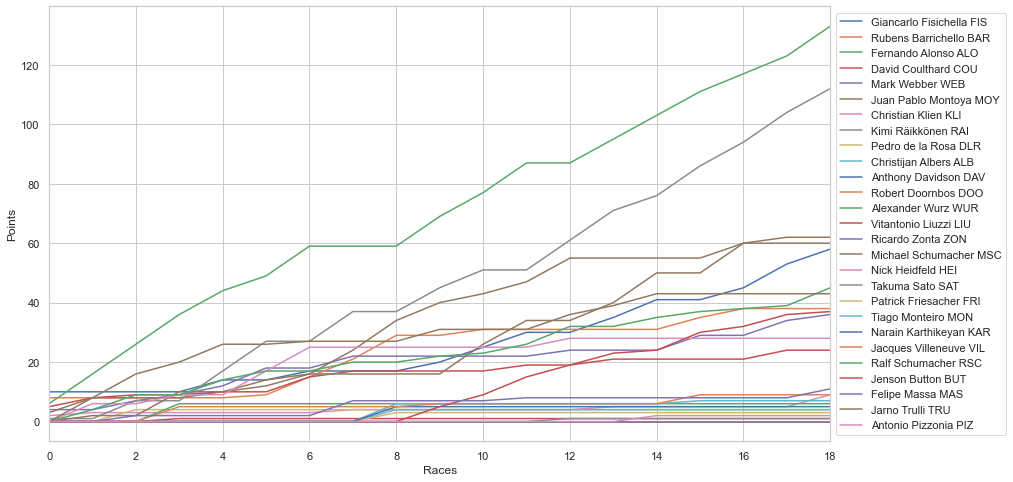

In [11]:
plot_cum_results(cum_05);

# As some seasons used to take a best N scores for the championship, we can do that here
## Currently hardcoded for N=11, needs to be generalized. 
## Also, it's important to be aware of whether this rule was applied

In [12]:
try:
    DX.year_results['1990'].drop(['Driver'], axis=1, inplace=True)
except:
    pass

C:\Users\cfcoo\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [14]:
best_11_df = DX.year_results['1990'].apply(best_11_cumsum, axis=1)

best_11_df = clean_best_11(best_11_df, DX.year_results['1990'])
best_11_df.head()

,united-states,brazil,san-marino,monaco,canada,mexico,france,great-britain,germany,hungary,belgium,italy,portugal,spain,japan,australia
Driver,,,,,,,,,,,,,,,,
Ayrton Senna SEN,9.0,13.0,13.0,22.0,31.0,31.0,35.0,39.0,48.0,54.0,63.0,72.0,78.0,78.0,78.0,78.0
Alain Prost PRO,0.0,9.0,12.0,12.0,14.0,23.0,32.0,41.0,44.0,44.0,50.0,56.0,60.0,69.0,69.0,71.0
Nelson Piquet PIQ,3.0,4.0,6.0,6.0,12.0,13.0,16.0,18.0,18.0,22.0,24.0,24.0,26.0,26.0,35.0,43.0
Gerhard Berger BER,0.0,6.0,12.0,16.0,19.0,23.0,25.0,25.0,29.0,29.0,33.0,37.0,40.0,40.0,40.0,43.0
Nigel Mansell MAN,0.0,3.0,3.0,3.0,7.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,22.0,28.0,28.0,34.0


# Only very small differences exist between the two scoring formats

<Figure size 1008x576 with 0 Axes>

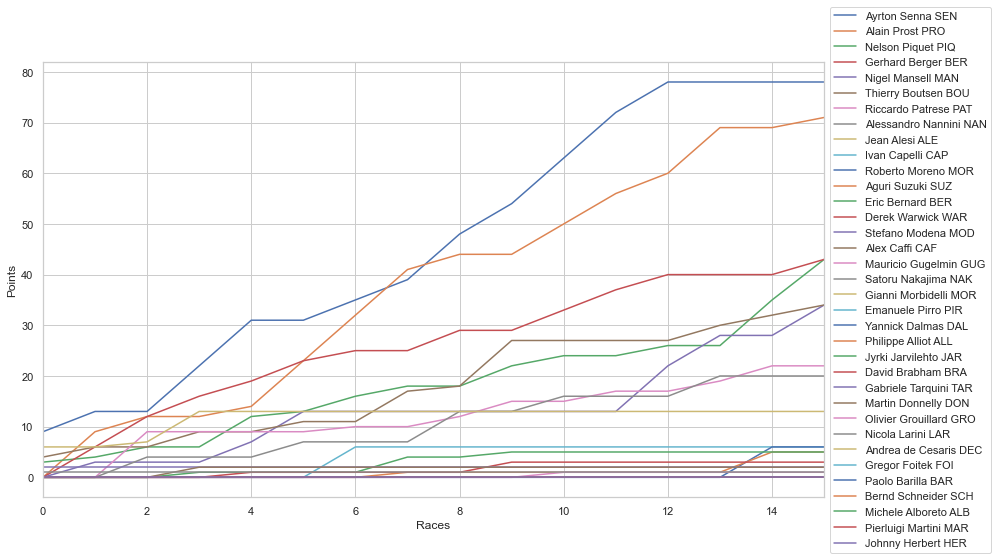

In [15]:
plot_cum_results(best_11_df);